In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

## Compute Gnocchi, and B-values for a set of windows that do or do not overlap enhancers


In [2]:
import pandas as pd

pd.set_option('display.max_columns', 50)

def get_chen_windows_with_enhancers_exons():
  # the following bed file was produced by experiments/germline-model/chen-et-al-2022/Fig_2a.Nonly.noisy.ipynb
  filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/mchale.kmerSizes.trainSets.noisy.enhancer-exon.bed'
  df = pd.read_csv(filename, sep='\t')
  df = df[['chromosome', 'start', 'end', 'enhancer overlap', 'merged_exon overlap', 'window overlaps enhancer', 'window overlaps merged_exon']]
  df = df.rename(columns={
    'chromosome': 'chrom'
  })
  return df

get_chen_windows_with_enhancers_exons()

,chrom,start,end,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon
0,chr1,1432000,1433000,1000.0,NaN,True,False
1,chr1,1435000,1436000,1000.0,444.0,True,True
2,chr1,1449000,1450000,NaN,311.0,False,True
3,chr1,1450000,1451000,NaN,758.0,False,True
4,chr1,1451000,1452000,NaN,NaN,False,False
...,...,...,...,...,...,...,...
1786072,chr9,137269000,137270000,1000.0,NaN,True,False
1786073,chr9,137275000,137276000,712.0,NaN,True,False
1786074,chr9,137282000,137283000,572.0,641.0,True,True
1786075,chr9,137290000,137291000,NaN,NaN,False,False


In [3]:
def get_chen_windows_with_gnocchi_B(): 
  # experiments/germline-model/chen-et-al-2022/Chen_models_SNV_counts_best_for_most_frequent_Bwindows.ipynb
  filename = f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.gnocchi.bmap.gnocchi_BGS_corrected_naive.bed'
  df = pd.read_csv(filename, sep='\t')
  df = df[['chrom', 'start', 'end', 'gnocchi', 'B']]
  return df 

get_chen_windows_with_gnocchi_B()

,chrom,start,end,gnocchi,B
0,chr1,1432000,1433000,4.299894,0.653
1,chr1,1435000,1436000,3.331645,0.652
2,chr1,1449000,1450000,1.817267,0.652
3,chr1,1450000,1451000,1.365863,0.652
4,chr1,1451000,1452000,0.666316,0.652
...,...,...,...,...,...
1605781,chr9,137269000,137270000,5.276351,0.536
1605782,chr9,137275000,137276000,2.687348,0.536
1605783,chr9,137282000,137283000,-0.090791,0.536
1605784,chr9,137290000,137291000,2.162811,0.536


In [4]:
def get_chen_windows_with_all_features(): 
  df = get_chen_windows_with_enhancers_exons()
  df = df.merge(get_chen_windows_with_gnocchi_B(), on=['chrom', 'start', 'end'], how='inner')
  return df 

WINDOWS = get_chen_windows_with_all_features()
WINDOWS 

,chrom,start,end,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,gnocchi,B
0,chr1,1432000,1433000,1000.0,NaN,True,False,4.299894,0.653
1,chr1,1435000,1436000,1000.0,444.0,True,True,3.331645,0.652
2,chr1,1449000,1450000,NaN,311.0,False,True,1.817267,0.652
3,chr1,1450000,1451000,NaN,758.0,False,True,1.365863,0.652
4,chr1,1451000,1452000,NaN,NaN,False,False,0.666316,0.652
...,...,...,...,...,...,...,...,...,...
1597324,chr9,137269000,137270000,1000.0,NaN,True,False,5.276351,0.536
1597325,chr9,137275000,137276000,712.0,NaN,True,False,2.687348,0.536
1597326,chr9,137282000,137283000,572.0,641.0,True,True,-0.090791,0.536
1597327,chr9,137290000,137291000,NaN,NaN,False,False,2.162811,0.536


## Gnocchi differentiates non-exonic windows that do/don't overlap enhancers less when background selection is stronger (smaller B)

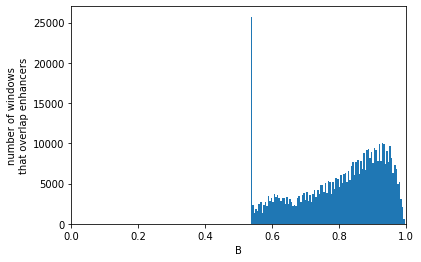

<ipython-input-5-6aa7dfaf07c9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_bin['gnocchi_quantile'] = pd.qcut(df_B_bin['gnocchi'], q=number_of_gnocchi_quantiles, labels=False)


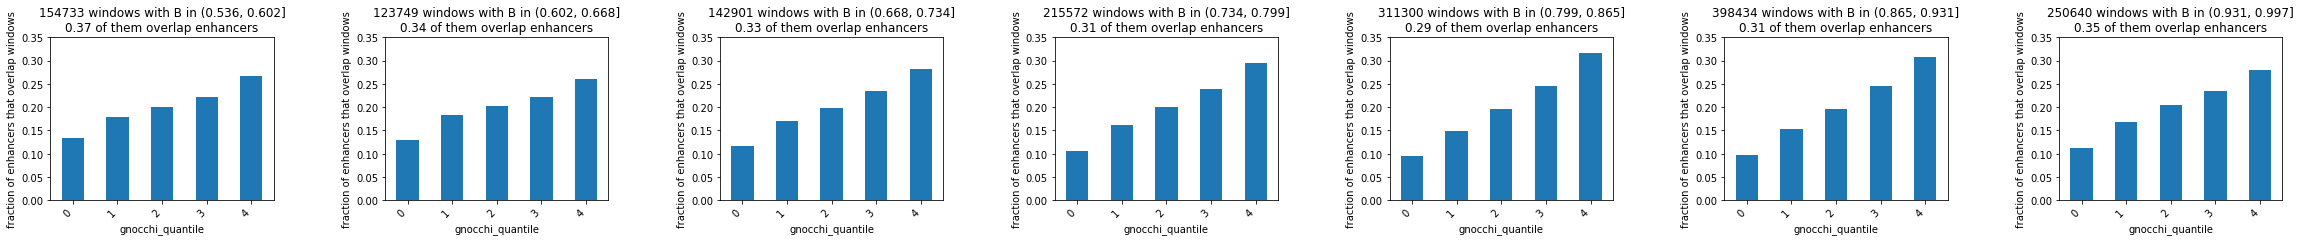

In [5]:
import matplotlib.pyplot as plt
from aggregate import aggregate

def plot_enhancer_fraction_distribution(df, number_B_bins=7, number_of_gnocchi_quantiles=5, ymax=0.35): 
  df = df.copy()

  df[df['window overlaps enhancer']].plot.hist(y='B', bins=100, title=None, legend=False)
  plt.xlabel('B')
  plt.ylabel('number of windows\nthat overlap enhancers')
  plt.xlim(0, 1)
  plt.show()

  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins)

  plt.rcParams.update({
    'font.size': 10,
  })
  fig, axs = plt.subplots(1, number_B_bins, figsize=(40, 3))
  plt.subplots_adjust(wspace=0.5)

  for i, B_bin in enumerate(sorted(df['B_bin'].unique())): 
    df_B_bin = df[df['B_bin'] == B_bin]
    number_of_windows_overlapping_enhancers = df_B_bin['window overlaps enhancer'].sum()

    df_B_bin['gnocchi_quantile'] = pd.qcut(df_B_bin['gnocchi'], q=number_of_gnocchi_quantiles, labels=False)
    df_B_bin_aggregated = aggregate(
      df_B_bin, 
      group_columns = ['gnocchi_quantile'],
      aggregation_functions = {
        'window overlaps enhancer': ['sum'],
        'B': ['count']
      }
    )
  
    df_B_bin_aggregated['fraction of enhancers that overlap windows'] = df_B_bin_aggregated['sum window overlaps enhancer'] / number_of_windows_overlapping_enhancers
    df_B_bin_aggregated.plot.bar(x='gnocchi_quantile', y='fraction of enhancers that overlap windows', ax=axs[i], legend=False)
    axs[i].set_title(
      f'{len(df_B_bin)} windows with B in {B_bin}\n'
      f'{number_of_windows_overlapping_enhancers/len(df_B_bin):.2f} of them overlap enhancers'
    )
    axs[i].set_ylabel('fraction of enhancers that overlap windows')
    axs[i].set_ylim(0, ymax)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')  

plot_enhancer_fraction_distribution(WINDOWS)

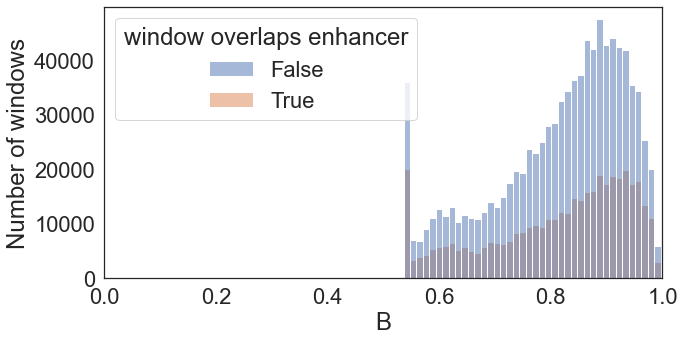

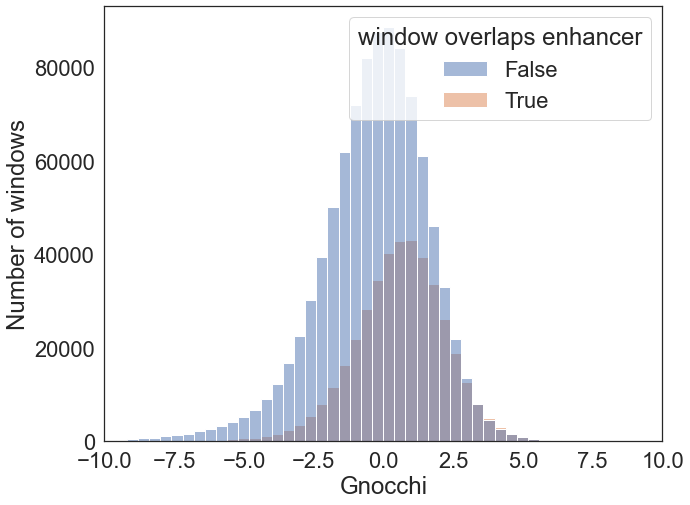

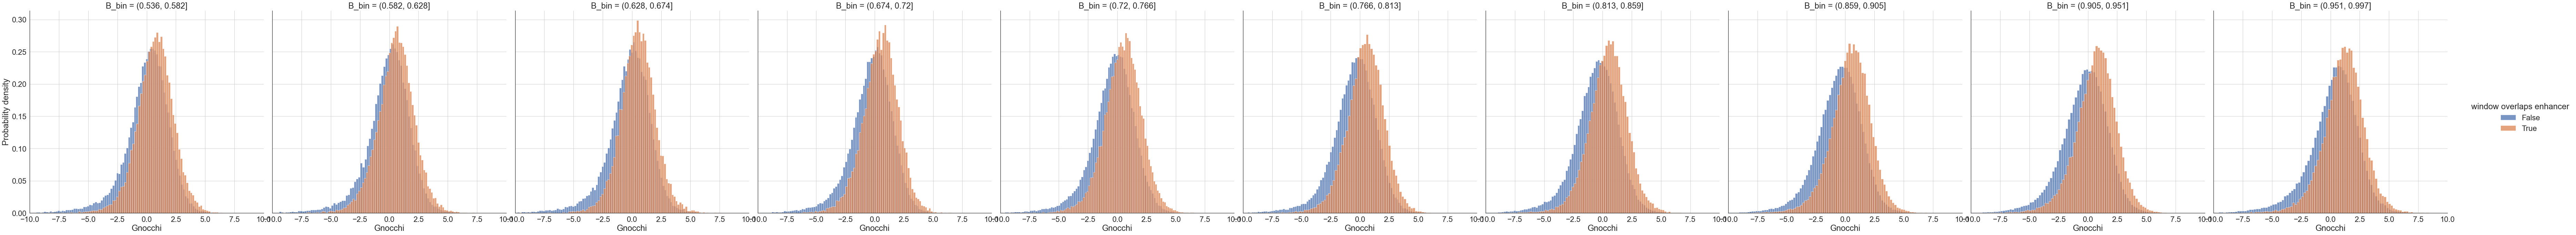

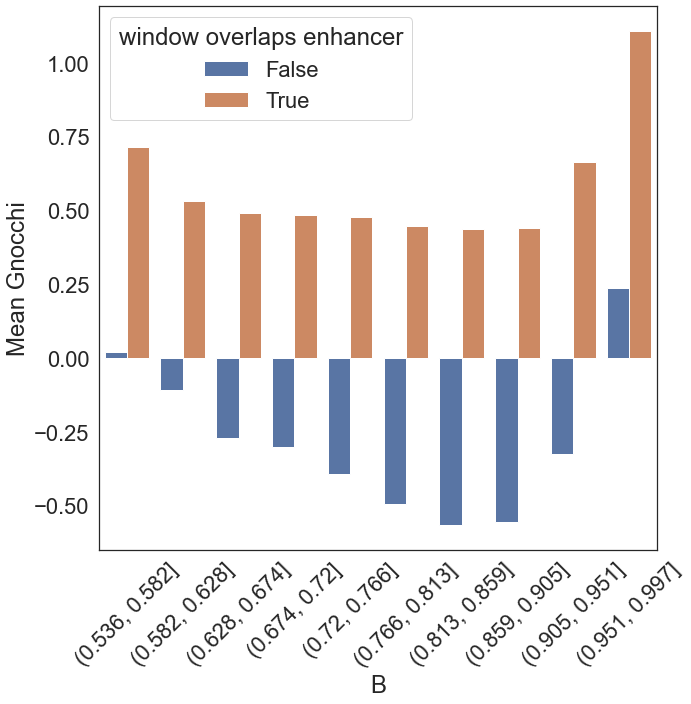

In [24]:
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 10)

import seaborn as sns

sns.set_theme(style='white', font_scale=2)

def plot_Gnocchi_and_B(df, number_B_bins=10): 
  df = df.copy() 

  df = df[df['window overlaps merged_exon'] == False] # strictly non-exonic windows

  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins)

  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x='B', hue='window overlaps enhancer', bins=40)
  plt.xlim(0, 1)
  plt.ylabel('Number of windows')

  plt.figure(figsize=(10, 8))
  sns.histplot(data=df, x='gnocchi', hue='window overlaps enhancer', bins=50)
  plt.xlabel('Gnocchi')
  plt.ylabel('Number of windows')
  plt.xlim(-10, 10)
  plt.show()

  g = sns.FacetGrid(df, col='B_bin', hue='window overlaps enhancer', height=10, aspect=1)
  g.map(sns.histplot, 'gnocchi', stat='density', common_bins=True, bins=100)
  g.set_ylabels("Probability density")
  g.set_xlabels('Gnocchi')
  g.add_legend()
  g.set(xlim=(-10, 10))

  # Show grid on each facet
  for ax in g.axes.flatten():
    ax.grid(True)  

  plt.show()

  df_aggregated = aggregate(
    df, 
    group_columns = ['B_bin', 'window overlaps enhancer'],
    aggregation_functions = {
      'gnocchi': [np.mean],
    }
  )
  plt.figure(figsize=(10, 10))
  sns.barplot(data=df_aggregated, x='B_bin', y='mean gnocchi', hue='window overlaps enhancer')
  plt.xlabel('B')
  plt.ylabel('Mean Gnocchi')
  plt.xticks(rotation=45)
  plt.show()

plot_Gnocchi_and_B(WINDOWS)

## Baseline classifier

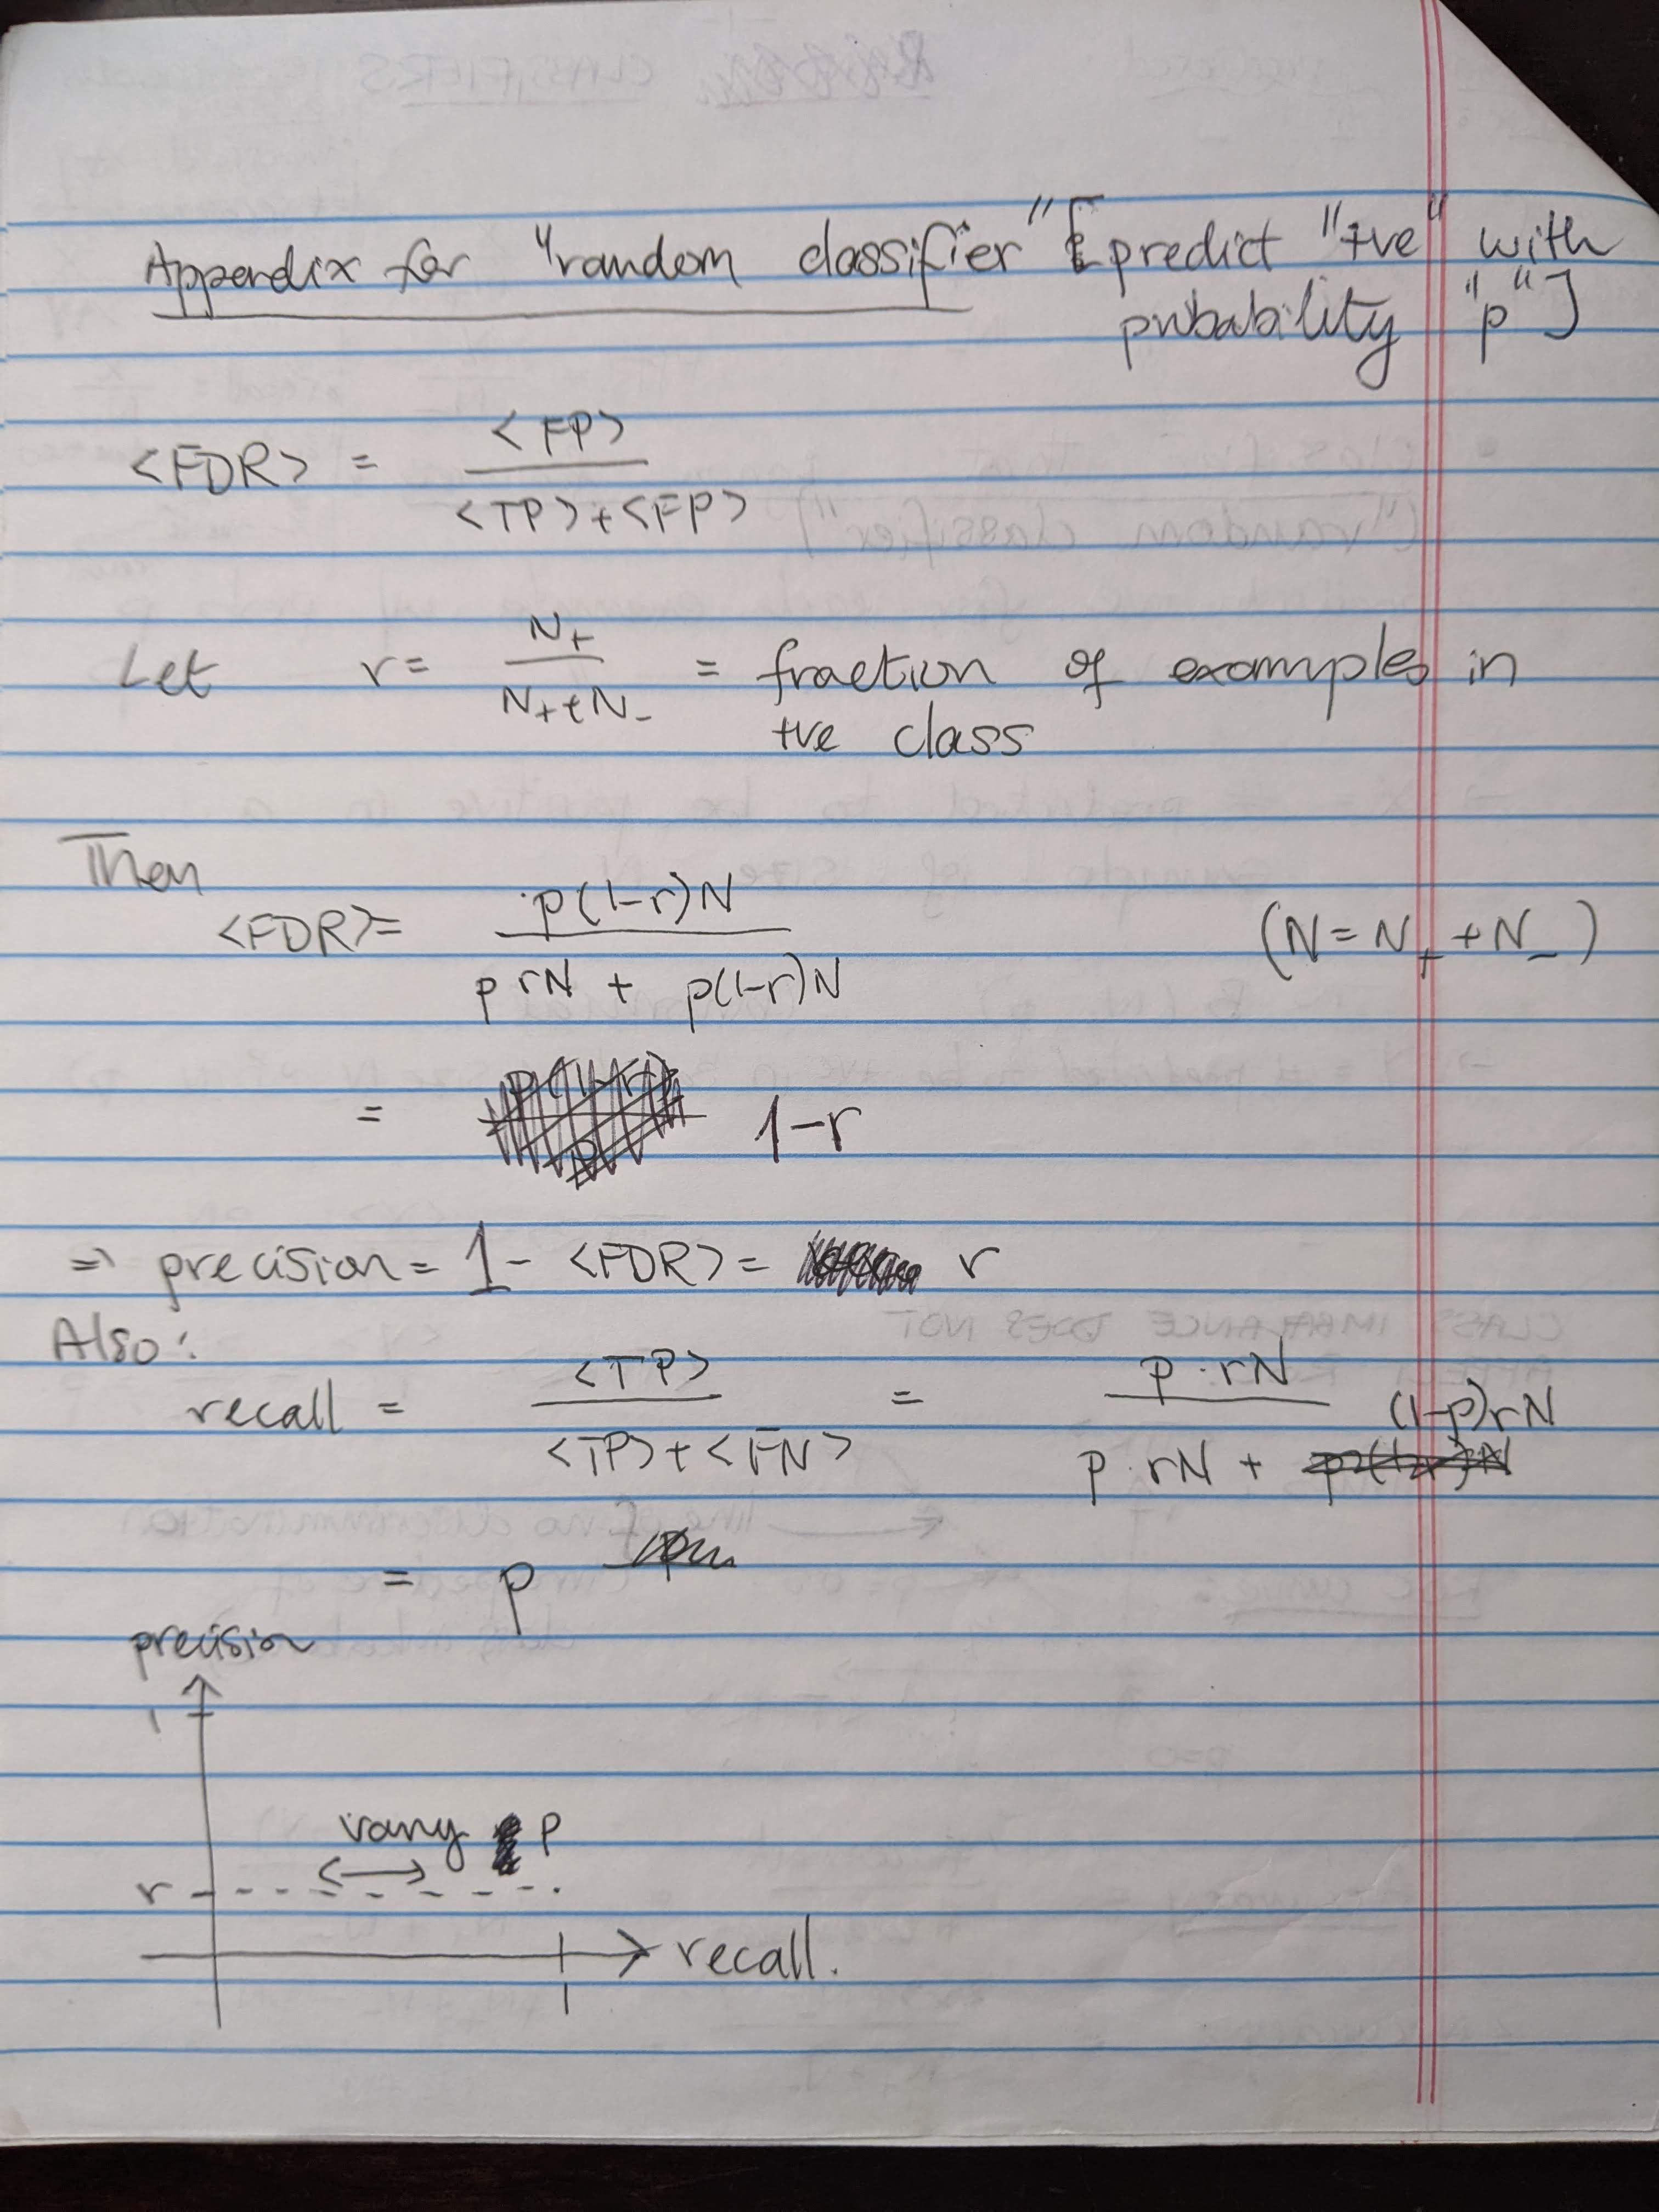

In [18]:
from IPython.display import Image # type: ignore
Image(filename='precision_recall_random_classifier.jpg', width=600)

## Background selection negatively impacts a Gnocchi-based classifier

<ipython-input-74-7f7b663b0237>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted to be constrained'] = df[score] > score_threshold
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


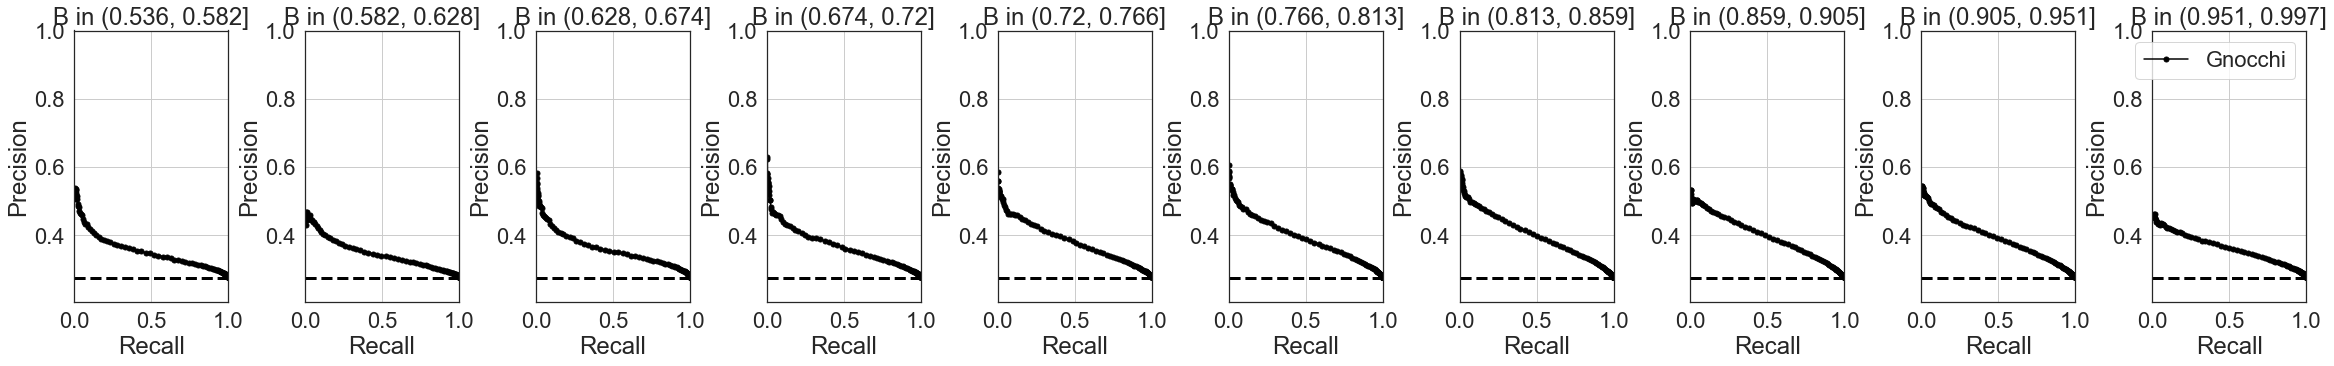

In [74]:
from click import group


def predict_and_compute_precision_recall_under_naive_classifier(df, score, score_threshold, target):
  df['predicted to be constrained'] = df[score] > score_threshold
  TP = df[(df[target] == True) & (df['predicted to be constrained'] == True)].shape[0]
  FP = df[(df[target] == False) & (df['predicted to be constrained'] == True)].shape[0]
  FN = df[(df[target] == True) & (df['predicted to be constrained'] == False)].shape[0]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  return precision, recall

def plot_precision_recall_under_naive_classifier(df, score, score_thresholds, target, color, linestyle, label, axis=None): 
  precision_recall = [
    predict_and_compute_precision_recall_under_naive_classifier(
      df, 
      score, 
      score_threshold, 
      target
    )
    for score_threshold in score_thresholds
  ]
  precisions, recalls = zip(*precision_recall)
  (axis if axis else plt).plot(
    recalls, 
    precisions, 
    label=label, 
    color=color,
    linestyle=linestyle,
    marker='o',
    markersize=5
  )
  
def compute_positive_fraction(df, target):
  # this is "r" in the baseline-classifier theory 
  number_negative_examples = df[target].value_counts().loc[False]
  number_positive_examples = df[target].value_counts().loc[True]
  return number_positive_examples / (number_negative_examples + number_positive_examples)

def plot_random_classifier(df, target, color, axis, title):
  r = compute_positive_fraction(df, target)
  axis.plot([0, 1], [r, r], linestyle='--', linewidth=3, color=color)  
  axis.set_xlabel('Recall')
  axis.set_ylabel('Precision')
  axis.set_xlim(0, 1)
  axis.set_ylim(r - (1-r)*0.1, 1)
  axis.set_title(title)

# TODO: check logic 
def downsample(df):
  group_columns = ['B_bin']

  # Find the size of the positive class in each group  
  positive_class_sizes = df.groupby(group_columns)['window overlaps enhancer'].apply(lambda x: x.value_counts()[True])

  # Find the size of the negative class in each group
  negative_class_sizes = df.groupby(group_columns)['window overlaps enhancer'].apply(lambda x: x.value_counts()[False])
  
  positive_to_negative_ratios = positive_class_sizes/negative_class_sizes

  min_positive_to_negative_ratio = positive_to_negative_ratios.min()

  def downsample_positive_class(group):
    negative_class = group[group['window overlaps enhancer'] == False]
    negative_class_size = len(negative_class)
    new_positive_class_size = int(min_positive_to_negative_ratio*negative_class_size)
    positive_class = group[group['window overlaps enhancer'] == True]
    positive_class_downsampled = positive_class.sample(new_positive_class_size)
    return pd.concat([positive_class_downsampled, negative_class])
  
  df_downsampled = df.groupby(group_columns).apply(downsample_positive_class).reset_index(drop=True)

  return df_downsampled

# TODO: plot PR curves on top of one another 
def plot_precision_recall_all(df, number_B_bins=10): 
  df = df.copy() 

  df = df[df['window overlaps merged_exon'] == False] # strictly non-exonic windows

  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins)

  df = downsample(df)

  fig, axs = plt.subplots(1, number_B_bins, figsize=(40, 5))
  plt.subplots_adjust(wspace=0.5)

  all_score_thresholds = number_B_bins*[np.arange(-7.5, 5.0, 0.1)]
  for i, (b_bin, score_thresholds) in enumerate(zip(sorted(df['B_bin'].unique()), all_score_thresholds)): 
    df_b_bin = df[df['B_bin'] == b_bin]
  
    plot_precision_recall_under_naive_classifier(
      df_b_bin, 
      score='gnocchi',
      score_thresholds=score_thresholds,
      target='window overlaps enhancer',   
      color='black',
      linestyle='-',
      axis=axs[i],
      label='Gnocchi',
    )  
    plot_random_classifier(
      df_b_bin, 
      target='window overlaps enhancer', 
      color='black', 
      axis=axs[i], 
      title=f'B in {b_bin}'
    )
    axs[i].grid(True)
    plt.legend()
    
plot_precision_recall_all(WINDOWS)